In [1]:
% matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [5]:
file=r'D:\backup\Data Science\Public Data sets\Assignment file.xlsx'

In [6]:
df=pd.read_excel(file)

## EDA

First a few basic exploration of data to get an insight into the type of features, the shape, data types and summary statistics

In [7]:
df.head()

,Timestamp,Current,Total voltage,SOC,Temperature,SOH,Equivalent cycle,Application status,Grid status,Grid power,Grid energy consumption,Grid cumulative energy consumption
0,1556701215000,0,66.72,1.0,25.229167,1.000000,0.0,1,1,0.0,0.0,0.0
1,1556702215000,0,66.72,1.0,25.528210,0.999774,0.0,1,1,0.0,0.0,0.0
2,1556703215000,0,66.72,1.0,25.859735,0.999679,0.0,1,1,0.0,0.0,0.0
3,1556704215000,0,66.72,1.0,26.204830,0.999606,0.0,1,1,0.0,0.0,0.0
4,1556705215000,0,66.72,1.0,26.553448,0.999542,0.0,1,1,0.0,0.0,0.0


In [5]:
df.shape

(31104, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31104 entries, 0 to 31103
Data columns (total 12 columns):
Timestamp                             31104 non-null int64
Current                               31104 non-null int64
Total voltage                         31104 non-null float64
SOC                                   31104 non-null float64
Temperature                           31104 non-null float64
SOH                                   31104 non-null float64
Equivalent cycle                      31104 non-null float64
Application status                    31104 non-null int64
Grid status                           31104 non-null int64
Grid power                            31104 non-null float64
Grid energy consumption               31104 non-null float64
Grid cumulative energy consumption    31104 non-null float64
dtypes: float64(8), int64(4)
memory usage: 2.8 MB


In [7]:
df.describe()

,Timestamp,Current,Total voltage,SOC,Temperature,SOH,Equivalent cycle,Application status,Grid status,Grid power,Grid energy consumption,Grid cumulative energy consumption
count,3.110400e+04,31104.000000,31104.000000,31104.000000,31104.000000,31104.000000,31104.000000,31104.000000,31104.000000,31104.000000,31104.000000,3.110400e+04
mean,1.572253e+12,-0.003858,64.272196,0.828945,27.915732,0.948226,52.563840,0.999968,0.988137,221.494578,61.526272,9.442240e+05
std,8.979096e+09,33.170852,1.918436,0.134033,13.308070,0.019635,31.301743,0.005670,0.108273,299.129090,83.091414,5.556151e+05
min,1.556701e+12,-300.000000,48.160346,-0.155714,20.263275,0.919398,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,1.564477e+12,0.000000,63.700213,0.781742,22.272948,0.932068,24.438458,1.000000,1.000000,0.000000,0.000000,4.466059e+05
50%,1.572253e+12,0.000000,65.299735,0.901914,26.060848,0.945187,52.499507,1.000000,1.000000,0.000000,0.000000,9.466569e+05
75%,1.580028e+12,10.000000,65.344541,0.905029,29.523420,0.963154,77.241660,1.000000,1.000000,617.410545,171.502929,1.386711e+06
max,1.587804e+12,10.000000,66.720000,1.000000,136.118156,1.000000,107.847718,1.000000,1.000000,654.014349,181.670653,1.913713e+06


Since this data is from a battery and there is a timestamp feature, it would be likely that the features are time dependant. Conevrting the timestamp data into an usable datetime feature would be useful. Extracting two features from the timestamp:

In [16]:
import datetime

In [17]:
df['timedelta']=pd.to_timedelta(df.Timestamp,box=False)
df['datetime']=pd.to_datetime(df.Timestamp,box=False)

## 1. Grid status-SOC

SOC stands for 'State of Charge' and is calculated in percentage fractions from 0 to 1. Let's filter out SOC below 0.0 for our analysis.

In [18]:
new_df=df.loc[df.SOC>0.0]

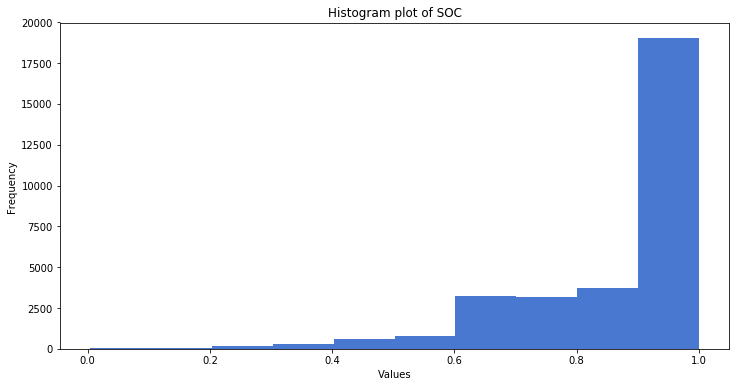

In [73]:
sns.set_palette('muted')
new_df.SOC.plot.hist(figsize=(12,6))

plt.title('Histogram plot of SOC')
plt.xlabel('Values')

plt.show()

In [7]:
new_df['Grid status'].value_counts()

1    30720
0      366
Name: Grid status, dtype: int64

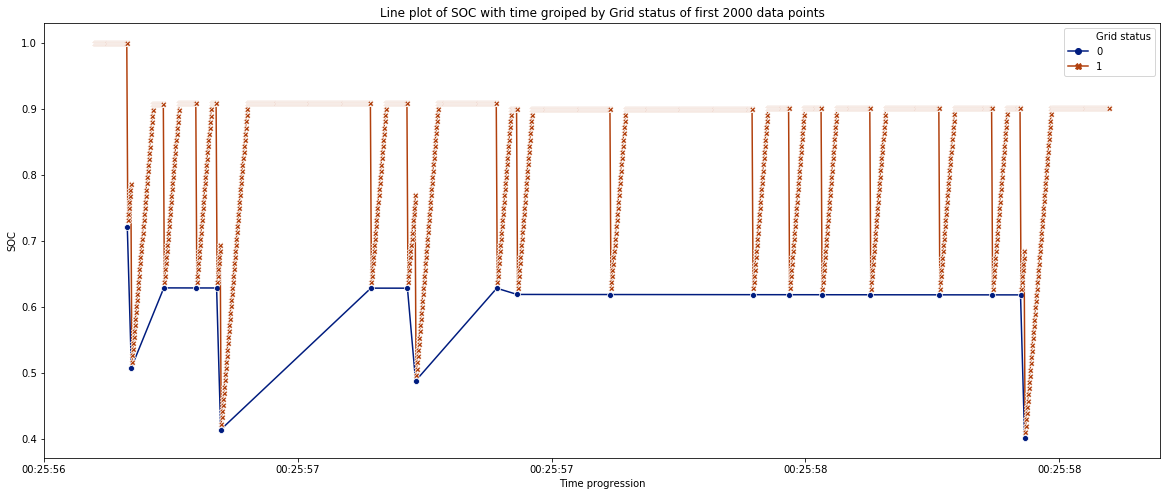

In [80]:
sns.set_palette('dark')
plt.figure(figsize=(20,8))
sns.lineplot(y='SOC',x='datetime',data=new_df[0:2000],hue='Grid status',style='Grid status',
             dashes=False,markers=True)
plt.title('Line plot of SOC with time grouped by Grid status of first 2000 data points')
plt.xlabel('Time progression')

plt.savefig('SOC-Grid status_1.png',dpi=400)

A detailed look into SOC variation with time of first 2000 observations shows that SOC varies with time and shows us a relation with grid status. Let's look at the last few observations to confirm that there's same variation throughout. 

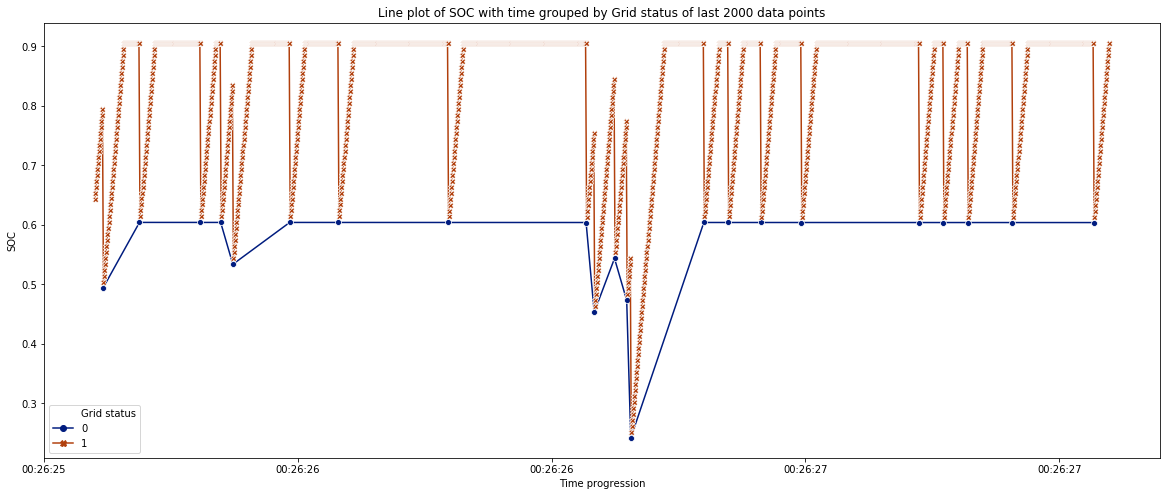

In [81]:
plt.figure(figsize=(20,8))
sns.set_palette('dark')
sns.lineplot(y='SOC',x='datetime',data=new_df[-2000:],hue='Grid status',style='Grid status',
             dashes=False,markers=True)
plt.title('Line plot of SOC with time grouped by Grid status of last 2000 data points')
plt.xlabel('Time progression')

plt.savefig('SOC-Grid status_2.png',dpi=400)

## Observation:
- SOC mostly has a static value at around 0.9 when grid status is 1. But whenever status changes to 0, SOC value exhibits an insatnt fall to around 0.6 and below, after which grid status changes to 1 and SOC steadily increases to around 0.9 again and maintains the same level till grid status changes to 0 again.

## 2. Equivalent cycle-SOH

We can see there is direct linear correlation between Equivalent cycle and SOH. Negative value of correlation suggests inverse relation between the two.

In [128]:
new_df=df[['Equivalent cycle','SOH','datetime']]

In [93]:
new_df.describe()

,Equivalent cycle,SOH
count,31104.000000,31104.000000
mean,52.563840,0.948226
std,31.301743,0.019635
min,0.000000,0.919398
25%,24.438458,0.932068
50%,52.499507,0.945187
75%,77.241660,0.963154
max,107.847718,1.000000


In [129]:
new_df[['Equivalent cycle','SOH']].corr()

,Equivalent cycle,SOH
Equivalent cycle,1.000000,-0.984262
SOH,-0.984262,1.000000


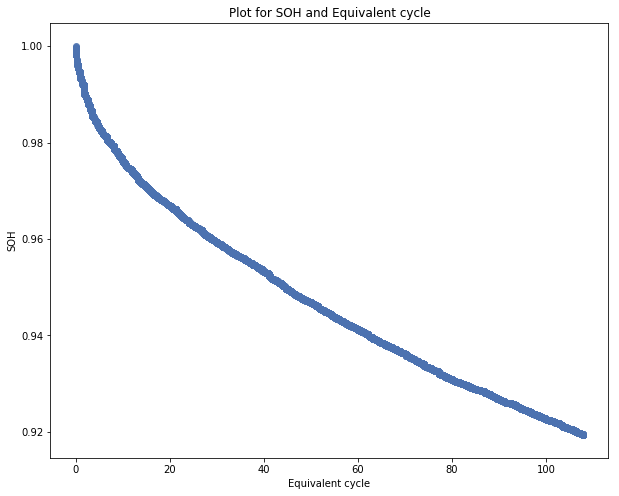

In [121]:
plt.figure(figsize=(10,8))
sns.set_palette('deep')
sns.regplot(x='Equivalent cycle',y='SOH',data=new_df,fit_reg=False)

plt.title('Plot for SOH and Equivalent cycle')
plt.savefig('SOH-Equivalent cycle_1.png',dpi=400)

We can see there's inverse correlation between equivalent cycle and SOH. As equivalent cycle increases, SOH first decreases exponentially and then almost linearly.

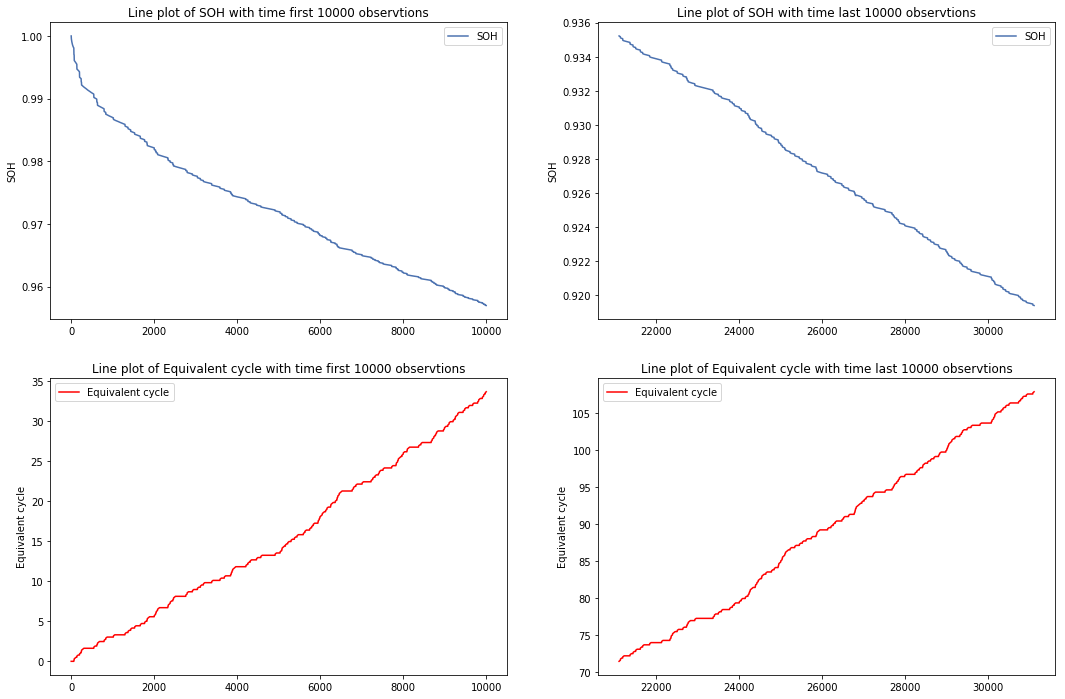

In [130]:
fig=plt.figure(figsize=(18,12))

ax0=fig.add_subplot(221)
ax1=fig.add_subplot(222)
ax2=fig.add_subplot(223)
ax3=fig.add_subplot(224)

new_df[['SOH']].head(10000).plot(ax=ax0)
ax0.set_title('Line plot of SOH with time first 10000 observtions')
ax0.set_ylabel('SOH')

new_df[['Equivalent cycle']].head(10000).plot(ax=ax2,color='red')
ax2.set_title ('Line plot of Equivalent cycle with time first 10000 observtions')
ax2.set_ylabel('Equivalent cycle')

new_df[['SOH']].tail(10000).plot(ax=ax1)
ax1.set_title('Line plot of SOH with time last 10000 observtions')
ax1.set_ylabel('SOH')

new_df[['Equivalent cycle']].tail(10000).plot(ax=ax3,color='red')
ax3.set_title ('Line plot of Equivalent cycle with time last 10000 observtions')
ax3.set_ylabel('Equivalent cycle')

plt.savefig('SOH-Equivalent cycle_2.png',dpi=400)

## Observation:
- SOH and Equivalent cycle are inversely related with a correlation coefficient of -0.984262. SOH value decreases over time from 1.0 to around 0.92 whereas equivalent cycle incereases over time from 0 to around 105.

## 3. Temperature-SOC

In [170]:
new_df=df[['datetime','SOC','Temperature']]

In [171]:
new_df=new_df.loc[new_df['SOC']>0.0]

In [172]:
new_df.set_index('datetime',inplace=True)

In [41]:
new_df.head()

,timedelta,SOC,Temperature
datetime,,,
1970-01-01 00:25:56.701215,00:25:56.701215,1.0,25.229167
1970-01-01 00:25:56.702215,00:25:56.702215,1.0,25.528210
1970-01-01 00:25:56.703215,00:25:56.703215,1.0,25.859735
1970-01-01 00:25:56.704215,00:25:56.704215,1.0,26.204830
1970-01-01 00:25:56.705215,00:25:56.705215,1.0,26.553448


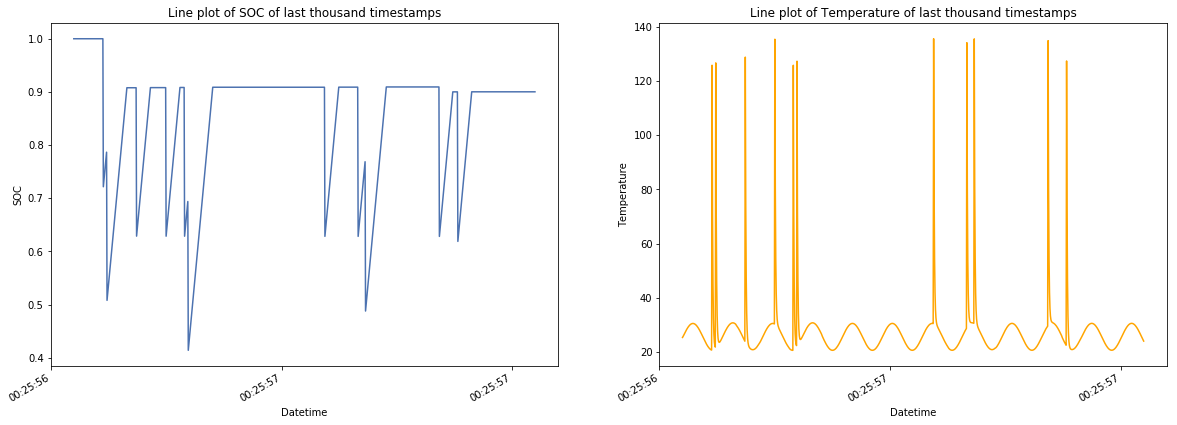

In [153]:
fig=plt.figure(figsize=(20,7))

ax0=fig.add_subplot(121)
ax1=fig.add_subplot(122)

new_df.SOC.head(1000).plot(ax=ax0)
ax0.set_title('Line plot of SOC of last thousand timestamps')
ax0.set_ylabel('SOC')
ax0.set_xlabel('Datetime')

new_df.Temperature.head(1000).plot(ax=ax1,color='orange')
ax1.set_title ('Line plot of Temperature of last thousand timestamps')
ax1.set_ylabel('Temperature')
ax1.set_xlabel('Datetime')

plt.savefig('SOC-Temperature_1.png',dpi=400)

We can see both SOC and Temperature varies with time. Temperature varies mostly sinusoidally between 20 to 30 with steep peaks in between. Lets try to get them both on same  plots

In [155]:
from sklearn.preprocessing import StandardScaler

In [174]:
scale=StandardScaler()
for col in ['Temperature','SOC']:
    
    new_df[col]=scale.fit_transform(new_df[col].reshape(-1,1))

In [175]:
new_df.head()

,SOC,Temperature
datetime,,
1970-01-01 00:25:56.701215,1.289016,-0.201600
1970-01-01 00:25:56.702215,1.289016,-0.179081
1970-01-01 00:25:56.703215,1.289016,-0.154116
1970-01-01 00:25:56.704215,1.289016,-0.128129
1970-01-01 00:25:56.705215,1.289016,-0.101877


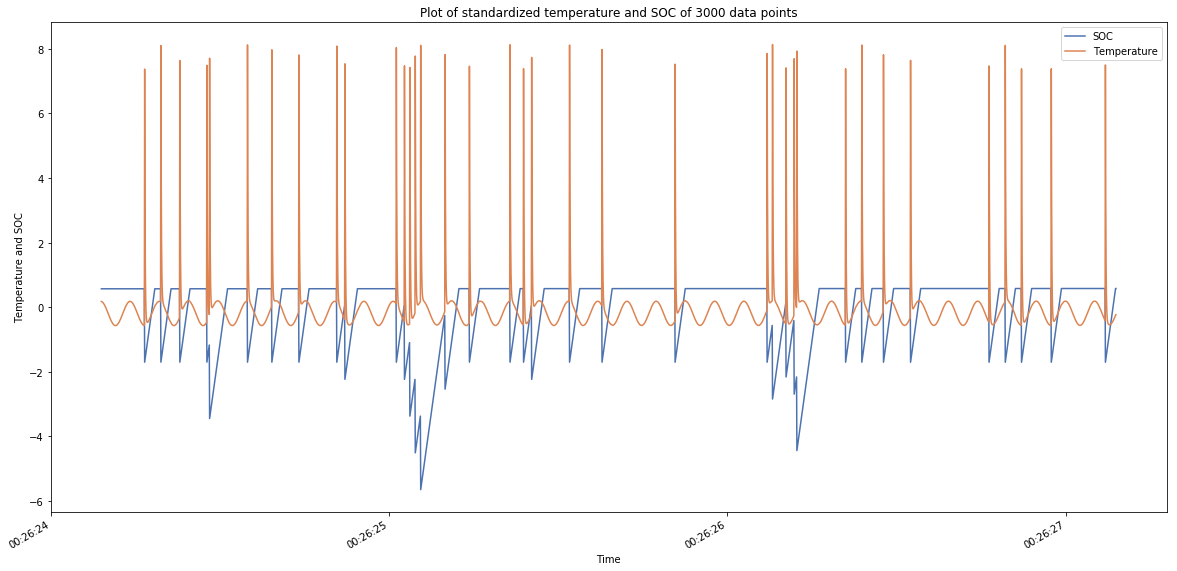

In [179]:
new_df.tail(3000).plot(kind='line',figsize=(20,10))
plt.ylabel('Temperature and SOC')
plt.title('Plot of standardized temperature and SOC of 3000 data points')
plt.xlabel("Time")
plt.savefig('SOC-Temperature_2.png',dpi=400)

## Observation:
- Both temperature and SOC behave normally together with temperature varrying sinusoidally with time while SOC remaining constant with time. But when temperature increases sharply, SOC decreases sharply showing a clear relation between the two.

##### The End